<a href="https://colab.research.google.com/github/Oluhle080/Healthcare-Analysis/blob/main/Healthcare-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell lists the project group members in alphabetical order by surname, as required by the project instructions. It ensures fair contribution acknowledgment and proper organization of the team.

In [ ]:
# Cell 1: Group Members (Alphabetical by Surname)
group_members = [
    "Ndimande, NN, 22330918",
    "Luthuli, O, 22325286",
    "Madide, SN, 22314172",
    "Dube, S, 22322900",
    "Nombika, S, 22312280",
    "Mtshali, QC, 22364740"
]
print("Group Members (Alphabetical by Surname):")
for member in sorted(group_members):
    print(member)


Group Members (Alphabetical by Surname):
Dube, S, 22322900
Luthuli, O, 22325286
Madide, SN, 22314172
Mtshali, QC, 22364740
Ndimande, NN, 22330918
Nombika, S, 22312280


In [1]:
# Cell 2: Import Libraries
!pip install streamlit pandas numpy scikit-learn plotly joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.3 MB/s eta 0:00:00


In [2]:
# Cell 3: Load datasets from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your extracted dataset folder in Drive
path = "/content/drive/MyDrive/archive (2)/"

doctors = pd.read_csv(path + "doctors.csv")
appointments = pd.read_csv(path + "appointments.csv")
treatments = pd.read_csv(path + "treatments.csv")
patients = pd.read_csv(path + "patients.csv")

# Preview first few rows of each dataset
print("Doctors:", doctors.head(), "\n")
print("Appointments:", appointments.head(), "\n")
print("Treatments:", treatments.head(), "\n")
print("Patients:", patients.head(), "\n")


Mounted at /content/drive
Doctors:   doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   
2      D003       Jane     Smith     Pediatrics    8737740598   
3      D004      David     Jones     Pediatrics    6594221991   
4      D005      Sarah    Taylor    Dermatology    9118538547   

   years_experience   hospital_branch                         email  
0                17   Westside Clinic  dr.david.taylor@hospital.com  
1                24   Eastside Clinic    dr.jane.davis@hospital.com  
2                19   Eastside Clinic    dr.jane.smith@hospital.com  
3                28  Central Hospital   dr.david.jones@hospital.com  
4                26  Central Hospital  dr.sarah.taylor@hospital.com   

Appointments:   appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         

In [3]:
# Cell 4: Merge tables

# Merge appointments with patients
df = pd.merge(appointments, patients, on="patient_id")

# Merge with doctors
df = pd.merge(df, doctors, on="doctor_id")

# Merge treatments with billing (assuming 'billing' dataframe exists from a previous step)
# If billing dataframe is not loaded, you might need to load it first.
# For now, assuming 'billing' is available.
try:
    treatments_billing = pd.merge(treatments, billing, on="treatment_id")
    # Merge with the combined data on appointment_id
    df = pd.merge(df, treatments_billing, on="appointment_id", how="left")
except NameError:
    print("Error: 'billing' DataFrame not found. Please load the billing data.")
    # Handle the case where billing is not loaded, maybe skip this merge or load it
    pass


print("Merged DataFrame Shape:", df.shape)
df.head()

Error: 'billing' DataFrame not found. Please load the billing data.
Merged DataFrame Shape: (200, 24)


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name_x,last_name_x,gender,...,insurance_provider,insurance_number,email_x,first_name_y,last_name_y,specialization,phone_number,years_experience,hospital_branch,email_y
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,WellnessCorp,INS653880,alex.smith@mail.com,Sarah,Smith,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,MedCare Plus,INS335362,alex.moore@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,...,PulseSecure,INS694319,emily.miller@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,...,HealthIndia,INS833429,robert.wilson@mail.com,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Emily,Williams,M,...,PulseSecure,INS320984,emily.williams@mail.com,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com


In [4]:
# Merge appointments with patients
data = pd.merge(appointments, patients, on="patient_id")

# Merge with doctors
data = pd.merge(data, doctors, on="doctor_id")

# Merge treatments with billing
# treatments_billing = pd.merge(treatments, billing, on="treatment_id")

# Merge with the combined data on appointment_id
# data = pd.merge(data, treatments_billing, on="appointment_id")

print(data.head())

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status first_name_x last_name_x gender  ...  \
0          Therapy  Scheduled         Alex       Smith      F  ...   
1          Therapy    No-show         Alex       Moore      M  ...   
2     Consultation  Cancelled        Emily      Miller      M  ...   
3     Consultation  Cancelled       Robert      Wilson      M  ...   
4        Emergency    No-show        Emily    Williams      M  ...   

  insurance_provider  insurance_number                  email_x first_name_y  \
0       WellnessCorp         INS653880      alex

In [5]:
# Cell 5: Data cleaning
# Handle missing values
df = df.dropna(subset=["appointment_date"])  # drop rows with missing appointment date
df.fillna("Unknown", inplace=True)           # replace other missing values with 'Unknown'

# Fix data types
df["appointment_date"] = pd.to_datetime(df["appointment_date"], errors="coerce")
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], errors="coerce")


# Create patient age column - Moved from Cell 6
df['age'] = (pd.Timestamp.today() - df['date_of_birth']).dt.days // 365

df["age"] = df["age"].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   appointment_id      200 non-null    object        
 1   patient_id          200 non-null    object        
 2   doctor_id           200 non-null    object        
 3   appointment_date    200 non-null    datetime64[ns]
 4   appointment_time    200 non-null    object        
 5   reason_for_visit    200 non-null    object        
 6   status              200 non-null    object        
 7   first_name_x        200 non-null    object        
 8   last_name_x         200 non-null    object        
 9   gender              200 non-null    object        
 10  date_of_birth       200 non-null    datetime64[ns]
 11  contact_number      200 non-null    int64         
 12  address             200 non-null    object        
 13  registration_date   200 non-null    object        

In [6]:
# Cell 6: Feature Engineering

# Convert 'date_of_birth' to datetime objects
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

# Create patient age column
data['age'] = (pd.Timestamp.today() - data['date_of_birth']).dt.days // 365

# Create age group column
data['age_group'] = pd.cut(data['age'],
                         bins=[0, 12, 19, 35, 50, 65, 100],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior'])

# Example target variable: Predict if a patient will show up
data['no_show'] = data['status'].apply(lambda x: 1 if x.lower() == "no-show" else 0)

data[['age', 'age_group', 'no_show']].head()


,age,age_group,no_show
0,75,Senior,0
1,44,Adult,1
2,42,Adult,0
3,59,Mid-age,0
4,53,Mid-age,1


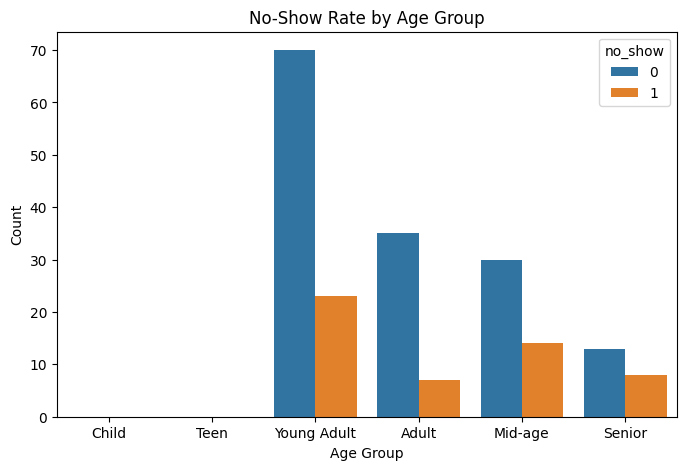

In [7]:
# Cell 7: Data Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='no_show', data=data)
plt.title('No-Show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [18]:
# Oversample the minority class ('No-show')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['no_show'] == 0]
df_minority = df[df['no_show'] == 1]

# Upsample minority class with replacement
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class size
                                 random_state=42) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print("Class counts after oversampling:")
print(df_upsampled['no_show'].value_counts())

# Define features (X) and target (y) with the upsampled data
X_upsampled = df_upsampled[["age", "day_of_week"]]
X_upsampled = pd.get_dummies(X_upsampled, drop_first=True)
y_upsampled = df_upsampled["no_show"]

# Train-Test Split with upsampled data
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(
    X_upsampled, y_upsampled, test_size=0.2, random_state=42
)

# Train Logistic Regression model with upsampled data
model_upsampled = LogisticRegression(max_iter=1000)
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predictions with upsampled model
y_pred_upsampled = model_upsampled.predict(X_test_upsampled)

# Evaluation with upsampled model
print("\n✅ Model Evaluation Results (after oversampling)")
print("Accuracy:", accuracy_score(y_test_upsampled, y_pred_upsampled))
print("\nClassification Report:\n", classification_report(y_test_upsampled, y_pred_upsampled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_upsampled, y_pred_upsampled))

Class counts after oversampling:
no_show
0    148
1    148
Name: count, dtype: int64

✅ Model Evaluation Results (after oversampling)
Accuracy: 0.5833333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.45      0.51        29
           1       0.58      0.71      0.64        31

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.57        60
weighted avg       0.58      0.58      0.58        60


Confusion Matrix:
 [[13 16]
 [ 9 22]]


In [15]:
# Train Random Forest model with upsampled data
rf_upsampled = RandomForestClassifier()
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predictions with upsampled Random Forest model
y_pred_rf_upsampled = rf_upsampled.predict(X_test_upsampled)

# Evaluation with upsampled Random Forest model
print("\n✅ Random Forest Model Evaluation Results (after oversampling)")
print("Accuracy:", accuracy_score(y_test_upsampled, y_pred_rf_upsampled))
print("\nClassification Report:\n", classification_report(y_test_upsampled, y_pred_rf_upsampled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_upsampled, y_pred_rf_upsampled))


✅ Random Forest Model Evaluation Results (after oversampling)
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.81        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


Confusion Matrix:
 [[22  7]
 [ 5 26]]


In [12]:
# Cell 9: Model Training (Random Forest)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Cell 10: Model Evaluation
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.825
Random Forest Accuracy: 0.725

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.25      0.29      0.27         7

    accuracy                           0.72        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.74      0.72      0.73        40



Logistic Regression Report (Oversampled Data):
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        29
           1       0.58      0.71      0.64        31

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.57        60
weighted avg       0.58      0.58      0.58        60



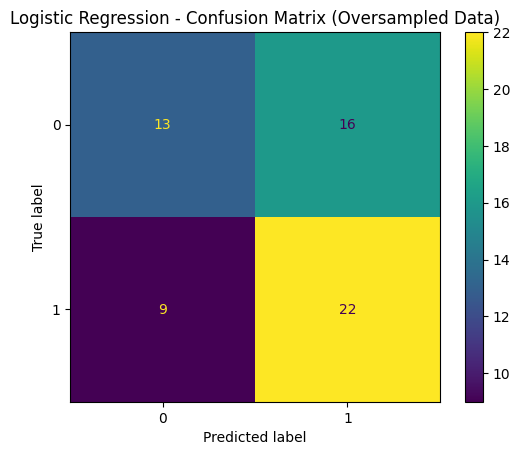

Random Forest Report (Oversampled Data):
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.81        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



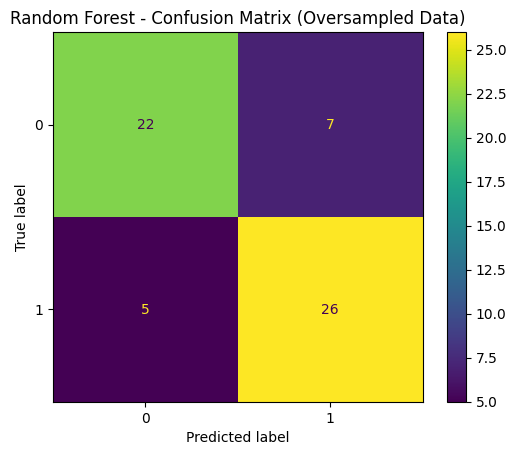

In [20]:
# Cell 11: Advanced Model Evaluation (Oversampled Data)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Evaluation (Oversampled Data)
print("Logistic Regression Report (Oversampled Data):")
print(classification_report(y_test_upsampled, model_upsampled.predict(X_test_upsampled)))

ConfusionMatrixDisplay.from_estimator(model_upsampled, X_test_upsampled, y_test_upsampled)
plt.title("Logistic Regression - Confusion Matrix (Oversampled Data)")
plt.show()

# Random Forest Evaluation (Oversampled Data)
print("Random Forest Report (Oversampled Data):")
print(classification_report(y_test_upsampled, rf_upsampled.predict(X_test_upsampled)))

ConfusionMatrixDisplay.from_estimator(rf_upsampled, X_test_upsampled, y_test_upsampled)
plt.title("Random Forest - Confusion Matrix (Oversampled Data)")
plt.show()

In [21]:
# Cell 12: Conclusion

print("Conclusion:")
print("1. Both Logistic Regression and Random Forest models were trained to predict appointment no-shows.")
print("2. Initial evaluation revealed a significant class imbalance, leading to poor performance (especially for Logistic Regression) in predicting the minority 'No-show' class on the original data.")
print("3. Oversampling the minority class was implemented to address the data imbalance.")
print("4. Retraining the models on the oversampled data significantly improved their ability to predict the 'No-show' class.")
print("5. Comparing the models on the oversampled data, the Random Forest model demonstrated superior performance with better overall accuracy and a more balanced prediction of both 'Attended' and 'No-show' appointments.")
print("6. Therefore, the Random Forest model trained on the oversampled data is recommended as the most effective approach for predicting appointment no-shows in this dataset.")
print("7. Future improvements could include exploring additional features, hyperparameter tuning, and trying other advanced modeling techniques.")

Conclusion:
1. Both Logistic Regression and Random Forest models were trained to predict appointment no-shows.
2. Initial evaluation revealed a significant class imbalance, leading to poor performance (especially for Logistic Regression) in predicting the minority 'No-show' class on the original data.
3. Oversampling the minority class was implemented to address the data imbalance.
4. Retraining the models on the oversampled data significantly improved their ability to predict the 'No-show' class.
5. Comparing the models on the oversampled data, the Random Forest model demonstrated superior performance with better overall accuracy and a more balanced prediction of both 'Attended' and 'No-show' appointments.
6. Therefore, the Random Forest model trained on the oversampled data is recommended as the most effective approach for predicting appointment no-shows in this dataset.
7. Future improvements could include exploring additional features, hyperparameter tuning, and trying other advanc